In [1]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn()

import sys
import os

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# Setting path to load util functions
from pathlib import Path
parent_dir = Path.cwd().parents[1]
sys.path.append(os.path.abspath(parent_dir))

In [3]:
train_df = pd.read_parquet('../../data/final_features_ml/train_all_features_last_month.parquet')
val_df = pd.read_parquet('../../data/final_features_ml/val_all_features_last_month.parquet')
test_df = pd.read_parquet('../../data/final_features_ml/test_all_features_last_month.parquet')

In [4]:
y_train = pd.read_parquet('../../data/3d_array/train_targets.parquet')
y_val = pd.read_parquet('../../data/3d_array/val_targets.parquet')
y_test = pd.read_parquet('../../data/3d_array/test_targets.parquet')

In [5]:
train_df.shape, y_train.shape, val_df.shape, y_val.shape, test_df.shape, y_test.shape

((289115, 426),
 (289115, 3),
 (32124, 426),
 (32124, 3),
 (137674, 426),
 (137674, 3))

In [6]:
train_df.sort_values(by = ['customer_ID'], inplace=True)
y_train.sort_values(by = ['customer_ID'], inplace=True)
val_df.sort_values(by = ['customer_ID'], inplace=True)
y_val.sort_values(by = ['customer_ID'], inplace=True)
test_df.sort_values(by = ['customer_ID'], inplace=True)
y_test.sort_values(by = ['customer_ID'], inplace=True)

In [7]:
train_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [8]:
train_df.head()

,customer_ID,D_39,B_1,R_1,B_4,B_5,R_2,D_47,B_7,D_51,...,S_5_Signal distance,B_14_Mean diff,B_11_Mean diff,S_8_Area under the curve,B_11_Area under the curve,S_8_Centroid,B_1_Area under the curve,B_1_Mean diff,S_26_Area under the curve,S_5_Area under the curve
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.009119,0.009382,0.006104,0.070793,0.231717,0.008309,0.539715,0.058425,0.673522,...,12.002586,-0.000679,0.000624,0.096573,0.000875,0.051362,0.001470,0.000055,0.001620,0.003494
1,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.009704,0.004284,0.006450,0.031044,0.001557,0.001687,0.339125,0.026981,0.342118,...,12.000076,0.000399,0.000285,0.000758,0.000575,0.066659,0.000541,0.000234,0.000715,0.000725
2,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,0.009776,0.007853,0.006885,0.004432,0.012747,0.008217,1.053603,0.006804,0.003867,...,12.002037,0.000065,-0.000788,0.030051,0.001411,0.053169,0.003310,-0.002275,0.000515,0.002074
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,0.000467,0.009413,0.007775,0.002541,0.006761,0.000599,0.016223,0.010545,0.005974,...,12.000053,-0.000506,-0.002254,0.026627,0.005694,0.052700,0.008939,-0.002907,0.000445,0.001086
4,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,0.531173,0.979303,0.008500,1.105429,0.025943,0.003394,0.125423,0.998107,0.000275,...,12.001062,-0.001064,0.002243,0.018268,0.113519,0.105902,0.112342,0.002037,0.000684,0.002241


In [9]:
y_train.head()

,customer_ID,end_of_month,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-03-31,0
1,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2018-03-31,0
2,000084e5023181993c2e1b665ac88dbb1ce9ef621ec537...,2018-03-31,0
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2018-03-31,0
4,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,2018-03-31,1


In [10]:
train_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289115 entries, 0 to 289114
Data columns (total 426 columns):
 #    Column                           Non-Null Count   Dtype  
---   ------                           --------------   -----  
 0    customer_ID                      289115 non-null  object 
 1    D_39                             289115 non-null  float32
 2    B_1                              289115 non-null  float32
 3    R_1                              289115 non-null  float32
 4    B_4                              289115 non-null  float32
 5    B_5                              289115 non-null  float32
 6    R_2                              289115 non-null  float32
 7    D_47                             289115 non-null  float32
 8    B_7                              289115 non-null  float32
 9    D_51                             289115 non-null  float32
 10   B_9                              289115 non-null  float32
 11   R_3                              289115 non-null  

In [11]:
from utils.mlflow_ml_model_logger import log_classification_model

Starting MLflow Run: Logistic Regression Base Model - Test (0906710ec9a342cb9a17c01edd71e329)
Logged model parameters.
Training the model...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:627: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.9000975
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.9001 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8323
Validation Weighted F1-Score: 0.8090
Validation Macro F1-Score: 0.7275
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.4097
Validation Precision Class 0: 0.8261
Validation Precision Class 1: 0.8774

              precision    recall  f1-score   support

           0     0.8261    0.9800    0.8965    102026
           1     0.8774    0.4097    0.5586     35648

    accuracy                         0.8323    137674
   macro avg     0.8518    0.6948    0.7275    137674
weighted avg     0.8394    0.8323    0.8090    137674

Logged validation

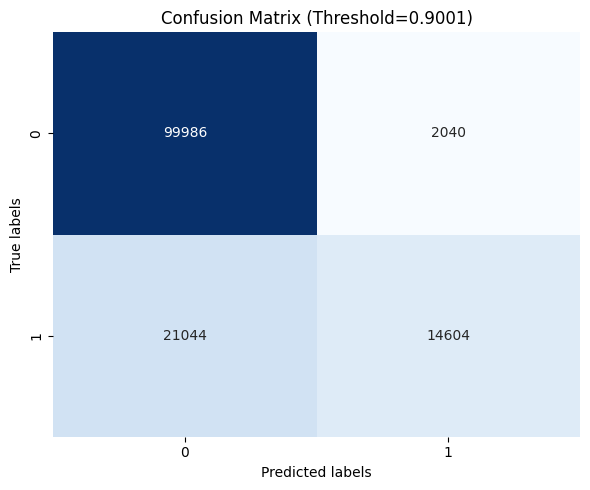

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/17 10:32:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 0906710ec9a342cb9a17c01edd71e329
View the run in the MLflow UI.


In [12]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, class_weight='balanced')
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="Logistic Regression Base Model - Test"
    )

Starting MLflow Run: Logistic Regression Base Model - Not Class Balanced - Test (6efde4c10cfd4fa49027fad07df837c6)
Logged model parameters.
Training the model...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:627: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7443509
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.7444 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8344
Validation Weighted F1-Score: 0.8118
Validation Macro F1-Score: 0.7320
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.4176
Validation Precision Class 0: 0.8280
Validation Precision Class 1: 0.8795

              precision    recall  f1-score   support

           0     0.8280    0.9800    0.8976    102026
           1     0.8795    0.4176    0.5663     35648

    accuracy                         0.8344    137674
   macro avg     0.8538    0.6988    0.7320    137674
weighted avg     0.8414    0.8344    0.8118    137674

Logged validation

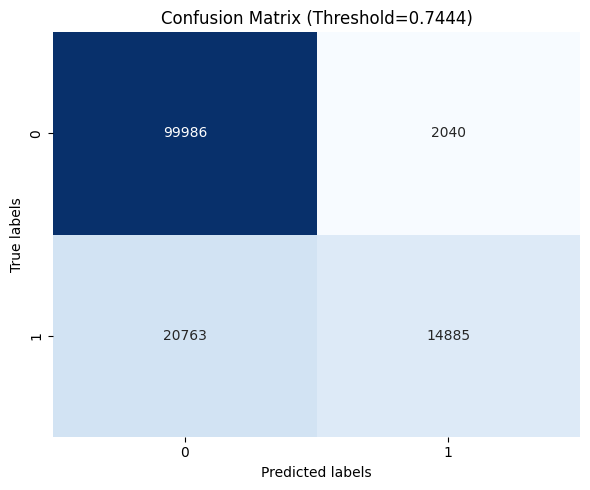

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/17 10:32:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 6efde4c10cfd4fa49027fad07df837c6
View the run in the MLflow UI.


In [13]:
model = LogisticRegression(random_state=0)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="Logistic Regression Base Model - Not Class Balanced - Test"
    )

Starting MLflow Run: XGBoost Base Model - Test (5de9663860694a30b71777fb0855f869)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...


c:\Users\vaseekaranv\AppData\Local\anaconda3\envs\nibm_dl\lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7901006
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.7901 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8653
Validation Weighted F1-Score: 0.8526
Validation Macro F1-Score: 0.7943
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5368
Validation Precision Class 0: 0.8583
Validation Precision Class 1: 0.9037

              precision    recall  f1-score   support

           0     0.8583    0.9800    0.9151    102026
           1     0.9037    0.5368    0.6735     35648

    accuracy                         0.8653    137674
   macro avg     0.8810    0.7584    0.7943    137674
weighted avg     0.8700    0.8653    0.8526    137674

Logged validation metrics (rounded to 4 decimals).
Generating Confusion Matrix plot...
S

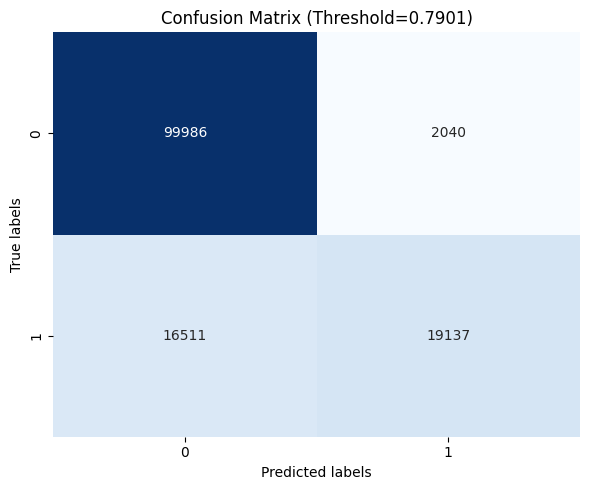

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/17 10:33:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 5de9663860694a30b71777fb0855f869
View the run in the MLflow UI.


In [14]:
#XGBoost
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0, tree_method = 'hist', device = 'cuda')
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="XGBoost Base Model - Test"
    )

Starting MLflow Run: CatBoost Base Model - Test (4ceba13cade64a56a8bcb98ae19d586f)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7551773
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.7552 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8698
Validation Weighted F1-Score: 0.8583
Validation Macro F1-Score: 0.8029
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5546
Validation Precision Class 0: 0.8630
Validation Precision Class 1: 0.9065

              precision    recall  f1-score   support

           0     0.8630    0.9800    0.9178    102026
           1     0.9065    0.5546    0.6881     35648

    accuracy                         0.8698    137

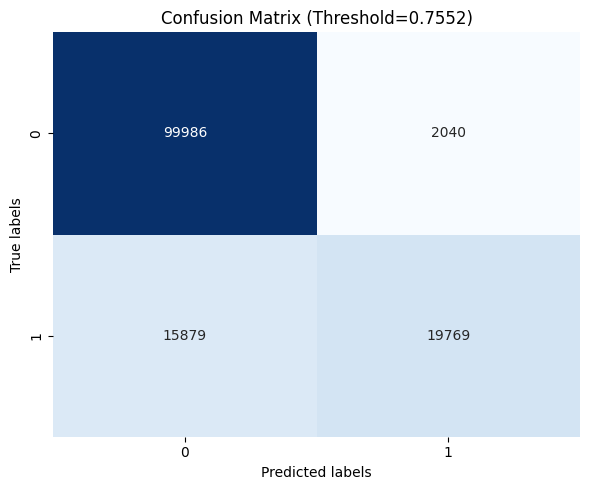

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/17 10:33:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 4ceba13cade64a56a8bcb98ae19d586f
View the run in the MLflow UI.


In [15]:
#CatBoost
from catboost import CatBoostClassifier
model = CatBoostClassifier(random_state=0, task_type='GPU', devices='0:1', verbose = 0)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="CatBoost Base Model - Test"
    )

Starting MLflow Run: LightGBM Base Model - Test (0518443c0811497b99a68df985891364)
Logged model parameters.
Training the model...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 74862, number of negative: 214253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.229719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 101943
[LightGBM] [Info] Number of data points in the train set: 289115, number of used features: 425
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258935 -> initscore=-1.051511
[LightGBM] [Info] Start training from score -1.051511
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7716132
Achieved Recall at Threshold: 0.9800
Using t

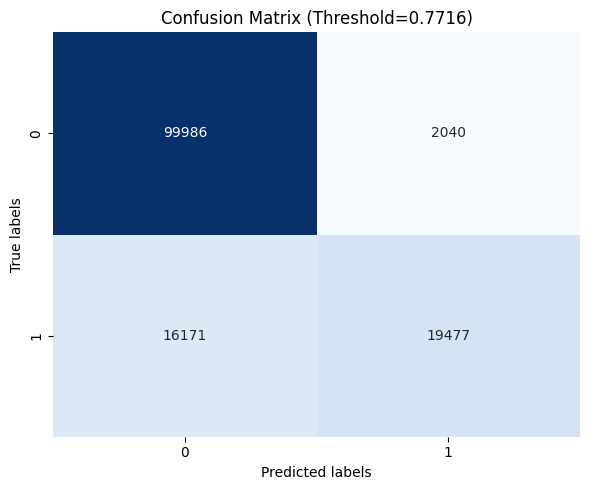

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/17 10:34:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 0518443c0811497b99a68df985891364
View the run in the MLflow UI.


In [16]:
#LigtGBM
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=0)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="LightGBM Base Model - Test"
    )

Starting MLflow Run: Hist Gradient Boosting Base Model - Test (5dd51ced67914ac48b69306a80b540b0)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.7702805
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.7703 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8684
Validation Weighted F1-Score: 0.8565
Validation Macro F1-Score: 0.8002
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5490
Validation Precision Class 0: 0.8615
Validation Precision Class 1: 0.9056

              precision    recall  f1-score   support

           0     0.8615    0.9800    0.9169    102026
           1     0.9056    0.5490    0.6835     35648

    accuracy                        

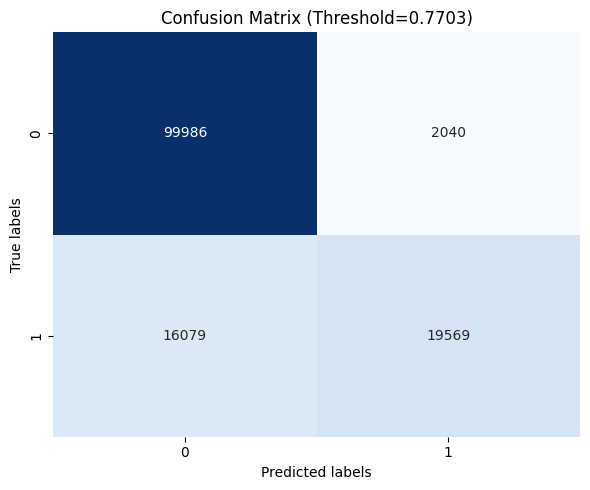

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/17 10:34:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 5dd51ced67914ac48b69306a80b540b0
View the run in the MLflow UI.


In [17]:
#Gradient Boosting
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(random_state=0)
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="Hist Gradient Boosting Base Model - Test"
    )

Starting MLflow Run: Easy Ensemble + XGBoost Base Model - Test (045b0cd45d344f7db44e86ec703f4ba4)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.9055046
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.9055 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8704
Validation Weighted F1-Score: 0.8590
Validation Macro F1-Score: 0.8039
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5566
Validation Precision Class 0: 0.8635
Validation Precision Class 1: 0.9068

              precision    recall  f1-score   support

           0     0.8635    0.9800    0.9181    102026
           1     0.9068    0.5566    0.6898     35648

    accuracy                       

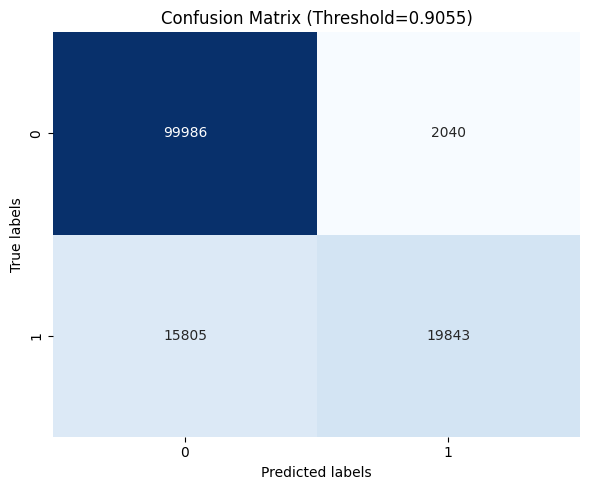

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/17 10:46:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 045b0cd45d344f7db44e86ec703f4ba4
View the run in the MLflow UI.


In [23]:
#Easy Ensemble + XGBoost
from imblearn.ensemble import EasyEnsembleClassifier
model = EasyEnsembleClassifier(random_state=0, n_jobs=-1, estimator=XGBClassifier(random_state = 0, tree_method = 'hist', device = 'cuda'))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="Easy Ensemble + XGBoost Base Model - Test"
    )

Starting MLflow Run: Easy Ensemble + LightGBM Base Model - Test (2e954199c62b404a965eee2f57a2299b)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.9011245
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.9011 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8685
Validation Weighted F1-Score: 0.8566
Validation Macro F1-Score: 0.8005
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5494
Validation Precision Class 0: 0.8616
Validation Precision Class 1: 0.9057

              precision    recall  f1-score   support

           0     0.8616    0.9800    0.9170    102026
           1     0.9057    0.5494    0.6839     35648

    accuracy                      

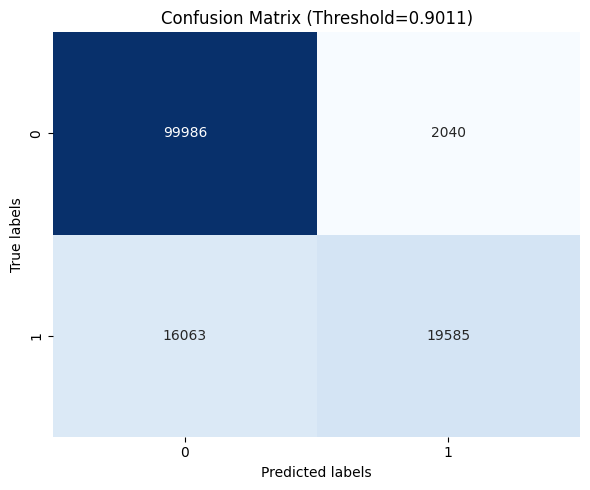

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/17 10:54:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 2e954199c62b404a965eee2f57a2299b
View the run in the MLflow UI.


In [24]:
# Easy Ensemble + LightGBM
from imblearn.ensemble import EasyEnsembleClassifier
model = EasyEnsembleClassifier(random_state=0, n_jobs=-1, estimator=LGBMClassifier(random_state = 0))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="Easy Ensemble + LightGBM Base Model - Test"
    )

Starting MLflow Run: Easy Ensemble + CatBoost Base Model - Test (cc6cb463fddb4ebb98260234776a844a)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.8988833
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.8989 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8690
Validation Weighted F1-Score: 0.8572
Validation Macro F1-Score: 0.8013
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5511
Validation Precision Class 0: 0.8620
Validation Precision Class 1: 0.9059

              precision    recall  f1-score   support

           0     0.8620    0.9800    0.9172    102026
           1     0.9059    0.5511    0.6853     35648

    accuracy                      

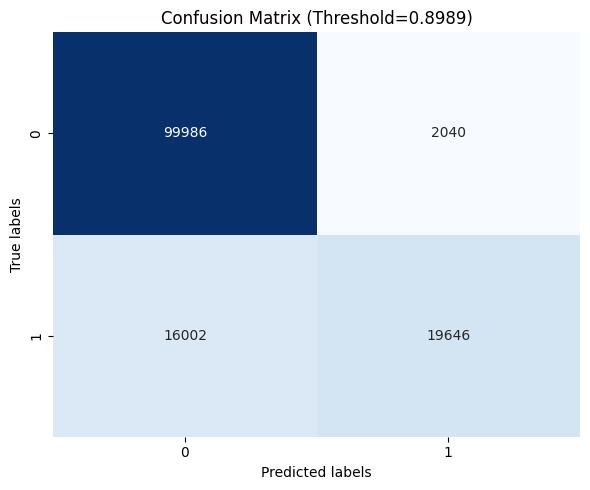

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/17 11:05:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: cc6cb463fddb4ebb98260234776a844a
View the run in the MLflow UI.


In [25]:
# Easy Ensemble + CatBoost
from imblearn.ensemble import EasyEnsembleClassifier
from catboost import CatBoostClassifier
model = EasyEnsembleClassifier(random_state=0, estimator=CatBoostClassifier(random_state=0, task_type='GPU', devices='0:1', verbose = 0))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="Easy Ensemble + CatBoost Base Model - Test"
    )

Starting MLflow Run: Balanced Bagging + XGBoost Base Model - Test (2b2b2c48747748709b1fee3b5627da52)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.9015044
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.9015 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8696
Validation Weighted F1-Score: 0.8580
Validation Macro F1-Score: 0.8026
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5537
Validation Precision Class 0: 0.8627
Validation Precision Class 1: 0.9063

              precision    recall  f1-score   support

           0     0.8627    0.9800    0.9176    102026
           1     0.9063    0.5537    0.6875     35648

    accuracy                    

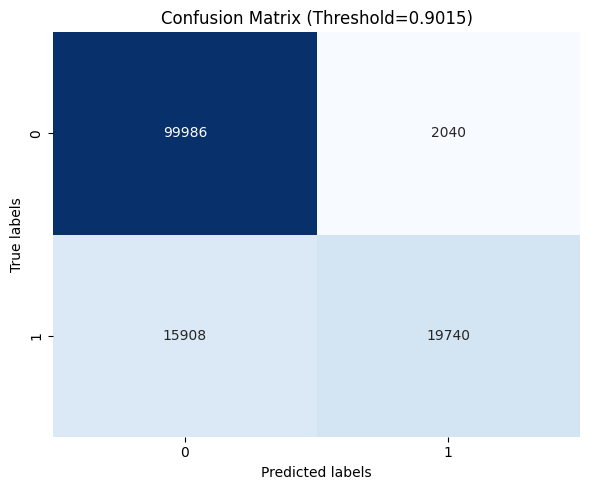

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/17 10:39:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 2b2b2c48747748709b1fee3b5627da52
View the run in the MLflow UI.


In [20]:
# Balanced Baagging + XGBoost Classifier
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier
model = BalancedBaggingClassifier(random_state=0, estimator=XGBClassifier(random_state = 0, tree_method = 'hist', device = 'cuda'))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="Balanced Bagging + XGBoost Base Model - Test"
    )

Starting MLflow Run: Balanced Bagging + LightGBM Base Model - Test (56b87af2d3714522aaeb597e9c95d326)
Logged model parameters.
Training the model...
Model training complete.
Evaluating the model on the validation set...
Attempting to find custom threshold using find_threshold_binary_search for Recall[0] >= 0.9800
Target Recall: >= 0.9800 for Class 0
Threshold found by Binary Search: 0.8985029
Achieved Recall at Threshold: 0.9800
Using threshold: Custom threshold 0.8985 aiming for Recall[0] >= 0.9800 (func achieved 0.9800)
Calculating performance metrics...
Validation Accuracy: 0.8685
Validation Weighted F1-Score: 0.8566
Validation Macro F1-Score: 0.8004
Validation Recall Class 0: 0.9800
Validation Recall Class 1: 0.5493
Validation Precision Class 0: 0.8616
Validation Precision Class 1: 0.9056

              precision    recall  f1-score   support

           0     0.8616    0.9800    0.9170    102026
           1     0.9056    0.5493    0.6838     35648

    accuracy                   

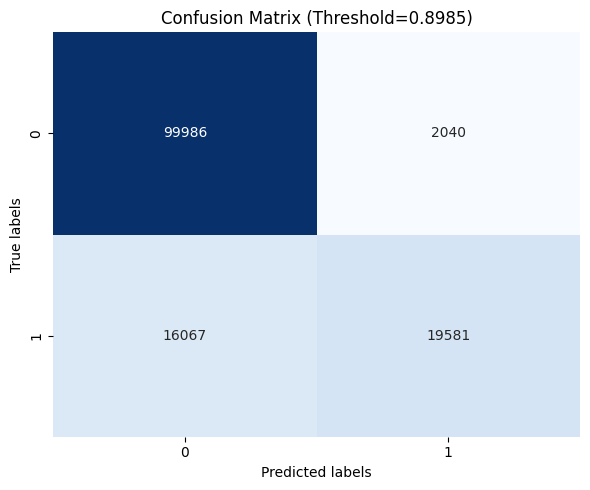

Displayed Confusion Matrix plot.
Logged Confusion Matrix plot artifact.
Logging classification report artifact...
Logged classification report artifact: classification_report_val.json
Logging the model...


2025/04/17 10:41:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged the trained model using mlflow.sklearn.
MLflow Run completed: 56b87af2d3714522aaeb597e9c95d326
View the run in the MLflow UI.


In [21]:
# Balanced Baagging + LightGBM Classifier
from lightgbm import LGBMClassifier
model = BalancedBaggingClassifier(random_state=0, estimator=LGBMClassifier(random_state = 0, verbose = 0))
log_classification_model(
        model=model,
        X_train=train_df.drop(columns=['customer_ID']),
        y_train=y_train['target'].values,
        X_val=test_df.drop(columns=['customer_ID']),
        y_val=y_test['target'].values,
        run_name="Balanced Bagging + LightGBM Base Model - Test"
    )